<a href="https://colab.research.google.com/github/SUTHARSHANARAM/SUTHARSHANARAM/blob/main/Spark%20program%20to%20compute%20box%20plots%20and%20histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+---+-----+
| id|value|
+---+-----+
|  1|   10|
|  2|   15|
|  3|   14|
|  4|   18|
|  5|   10|
|  6|   13|
|  7|   12|
|  8|   11|
|  9|   10|
| 10|   16|
+---+-----+

Mean: 12.9
Median: 12.0
Mode: 10
Standard Deviation: 2.8067379246694513
Variance: 7.877777777777778


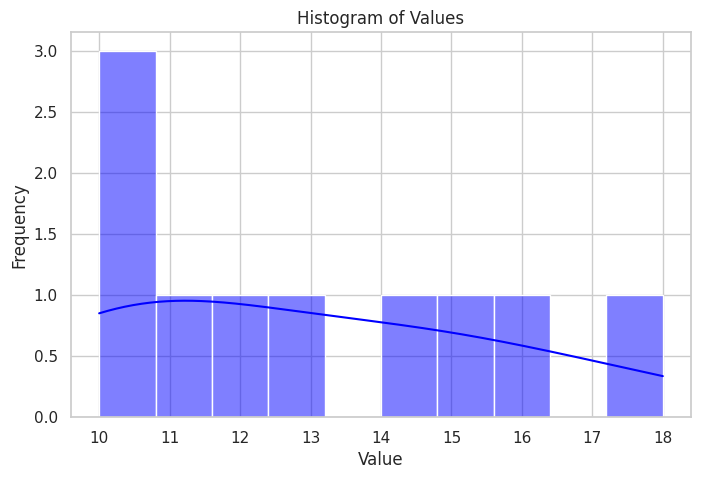

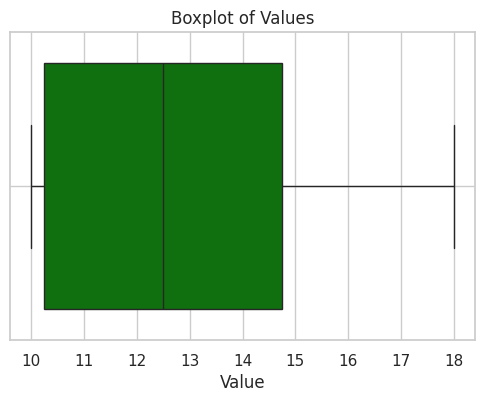

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Initialize Spark Session
spark = SparkSession.builder.appName("Statistics Computation").getOrCreate()

# Step 2: Create Sample Data
data = [
    (1, 10),
    (2, 15),
    (3, 14),
    (4, 18),
    (5, 10),
    (6, 13),
    (7, 12),
    (8, 11),
    (9, 10),
    (10, 16)
]

# Define the schema and create a DataFrame
columns = ["id", "value"]
df = spark.createDataFrame(data, schema=columns)
df.show()

# Step 3: Compute Statistics
# Mean
mean_value = df.select(F.mean("value")).collect()[0][0]

# Median
median_value = df.approxQuantile("value", [0.5], 0.0)[0]

# Standard Deviation
stddev_value = df.select(F.stddev("value")).collect()[0][0]

# Variance
variance_value = df.select(F.variance("value")).collect()[0][0]

# Mode (most frequent value)
mode_value = df.groupBy("value").count().orderBy(F.desc("count")).first()[0]

# Print Statistics
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Standard Deviation: {stddev_value}")
print(f"Variance: {variance_value}")

# Step 4: Convert to Pandas DataFrame
pandas_df = df.toPandas()

# Step 5: Plot Histogram and Boxplot
sns.set(style="whitegrid")

# Plot Histogram
plt.figure(figsize=(8, 5))
sns.histplot(pandas_df['value'], kde=True, color='blue', bins=10)
plt.title("Histogram of Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=pandas_df['value'], color='green')
plt.title("Boxplot of Values")
plt.xlabel("Value")
plt.grid(True)
plt.show()

# Step 6: Stop the Spark Session
spark.stop()
